### Plotting out training metric graphs  

Plotting out the average metric across each layer for the different model sizes.

You observe that as the models get larger that the CKA scores converge more monotonically 

In [13]:
from utils import METRICS, MODEL_SIZES, sort_and_filter_metrics, CHECKPOINT_STEPS, get_checkpoint_evals

from matplotlib import pyplot as plt
import pickle 
import numpy as np

#### Averaging across layers 

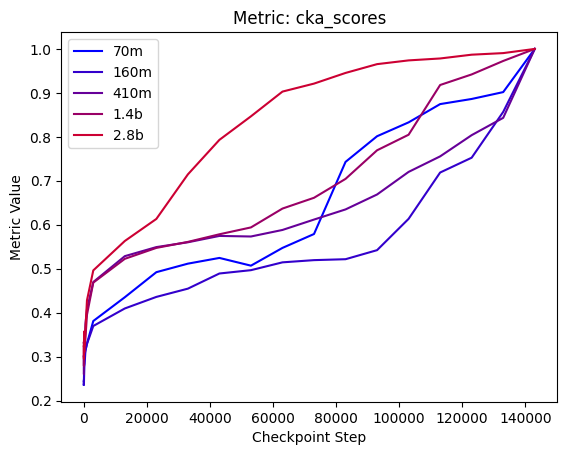

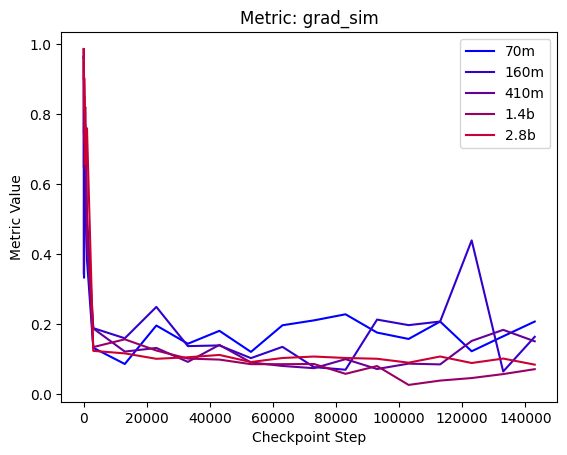

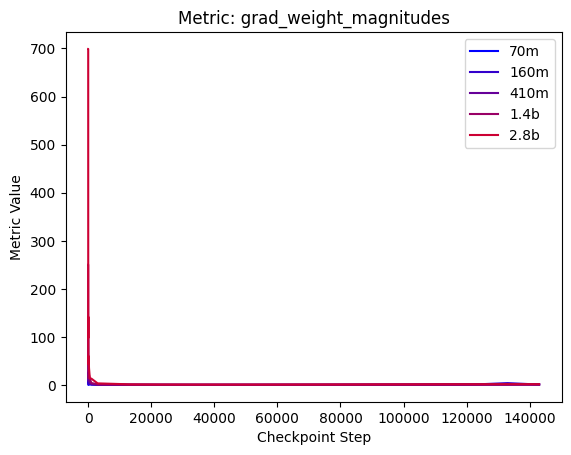

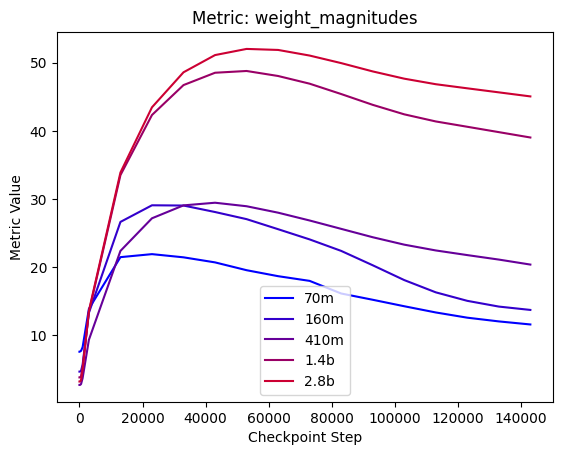

In [10]:
for metric_name in METRICS: 

    plt.title("Metric: " + metric_name)

    for i, model_size in enumerate(MODEL_SIZES): 
        # we want to compute the average metric for each of the model sizes and plot out 
        # the average metric as a function of the number of training steps
        try: 
            with open(f'/home/rd654/pretraining-playground/compiled_statistics/{model_size}/{metric_name}_per_layer.pkl', 'rb') as f:
                _metrics = pickle.load(f)
                metrics = sort_and_filter_metrics(_metrics, filter_layer_name="attention.dense")
        except: 
            continue 

        layer_average_metric = None
        for layer_checkpoint_metrics in metrics.values():
            if layer_average_metric is None:
                layer_average_metric = np.zeros(len(layer_checkpoint_metrics))
            
            layer_average_metric += np.array(layer_checkpoint_metrics)
        
        layer_average_metric /= len(metrics)

        color = (i / len(MODEL_SIZES), 0, 1 - i / len(MODEL_SIZES))
        plt.plot(CHECKPOINT_STEPS, layer_average_metric, label=model_size, color=color)
       
    plt.legend()
    plt.xlabel("Checkpoint Step")
    plt.ylabel("Metric Value")
    
    plt.show()


#### Within Model Size 

Plotting out the average metric across each layer for the different model sizes.

Observations: 

You observe that as the models get larger that the CKA scores converge more monotonically 

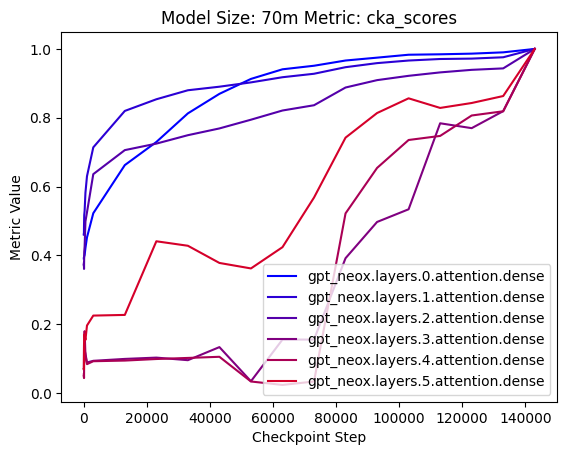

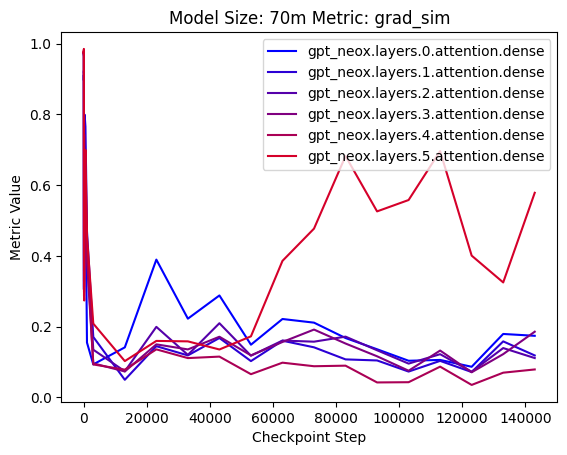

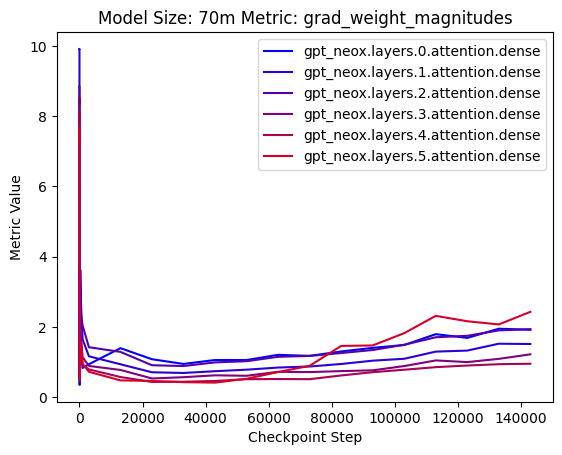

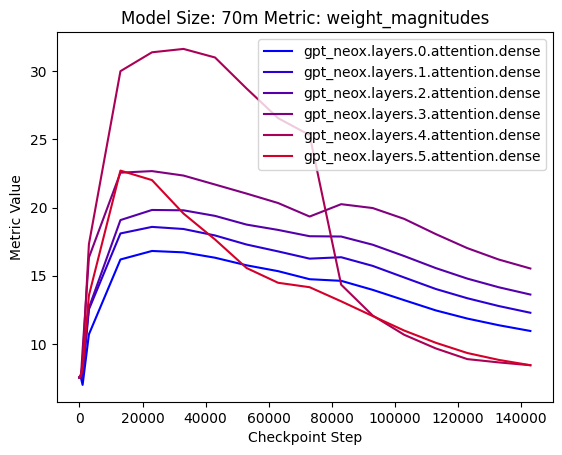

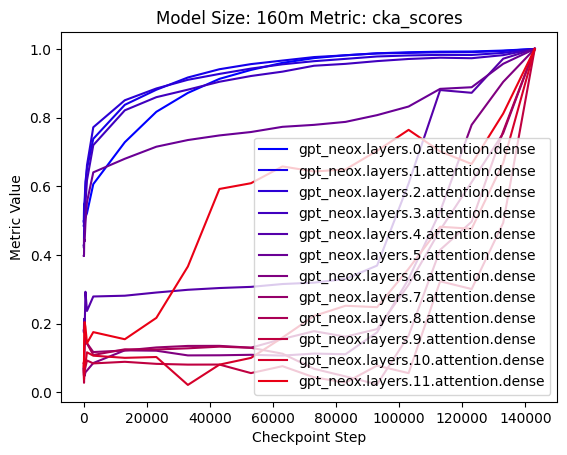

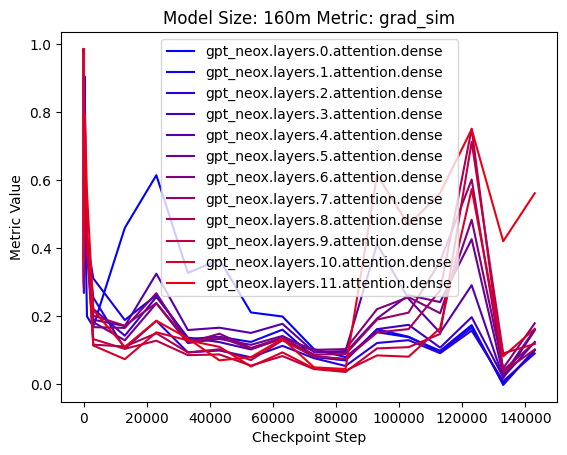

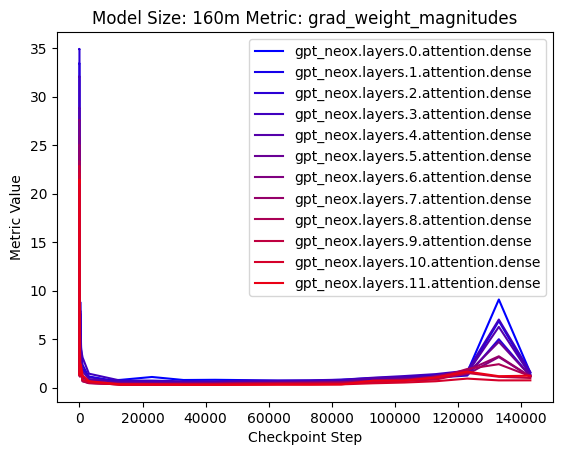

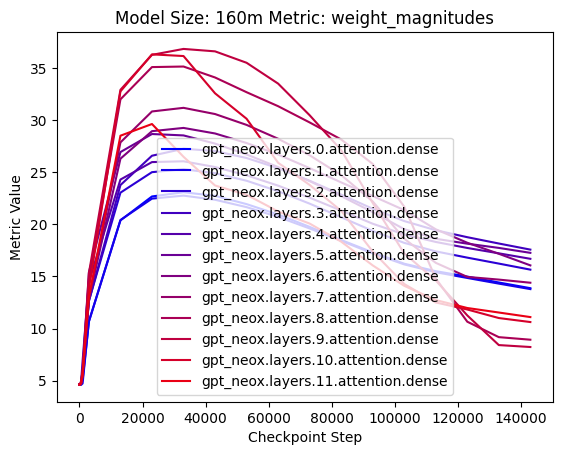

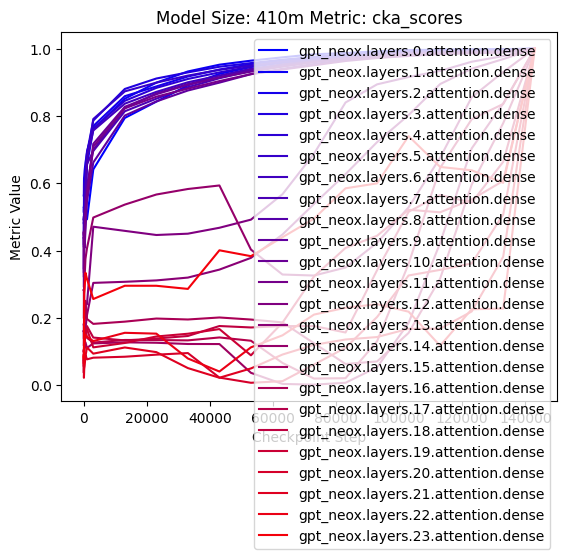

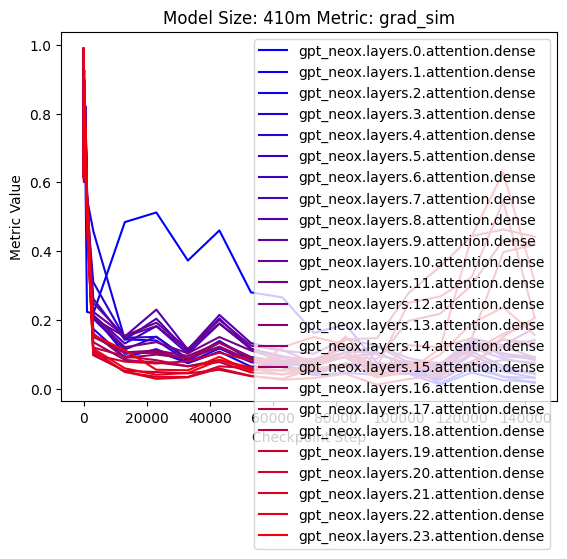

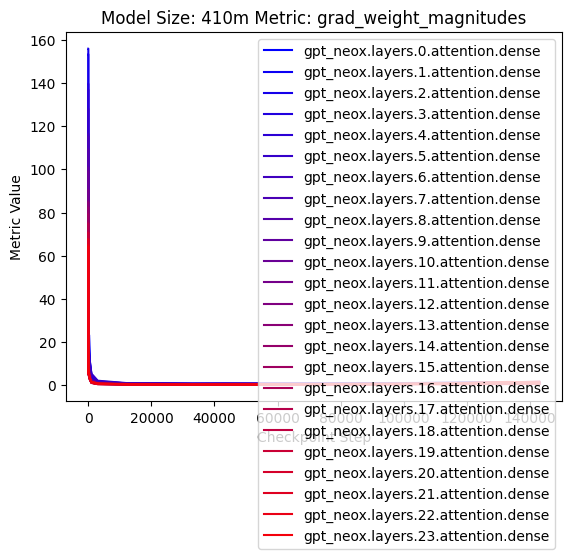

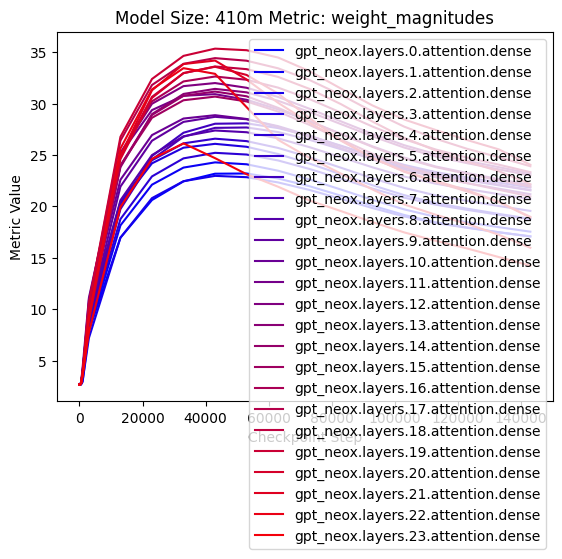

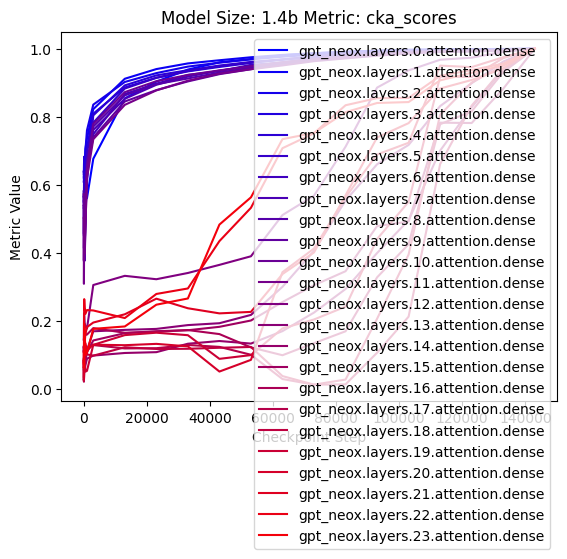

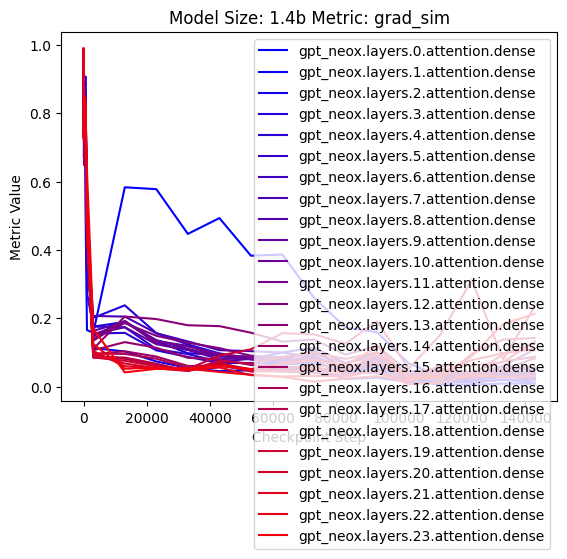

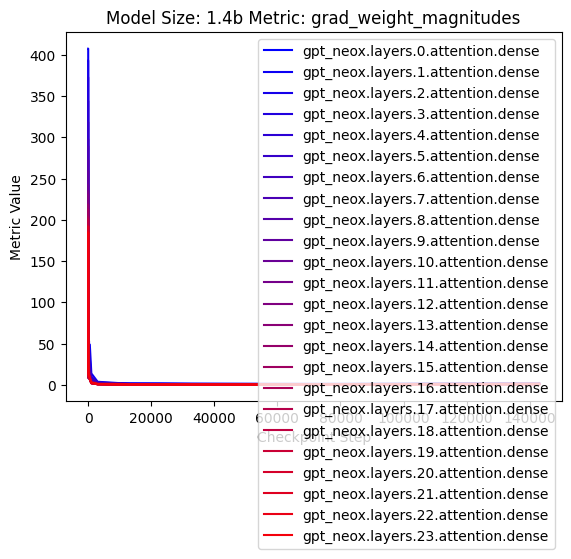

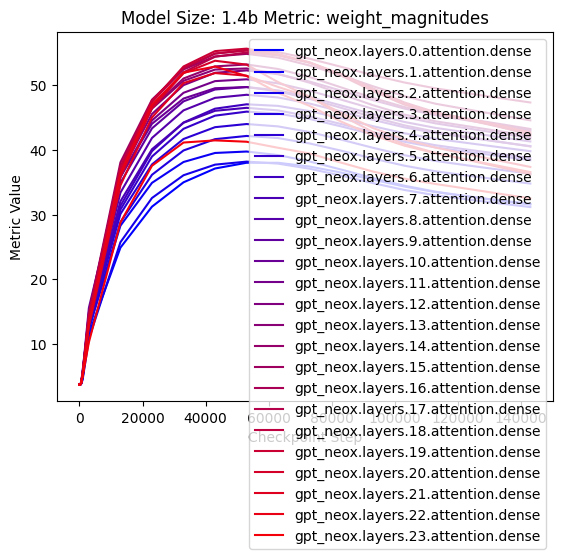

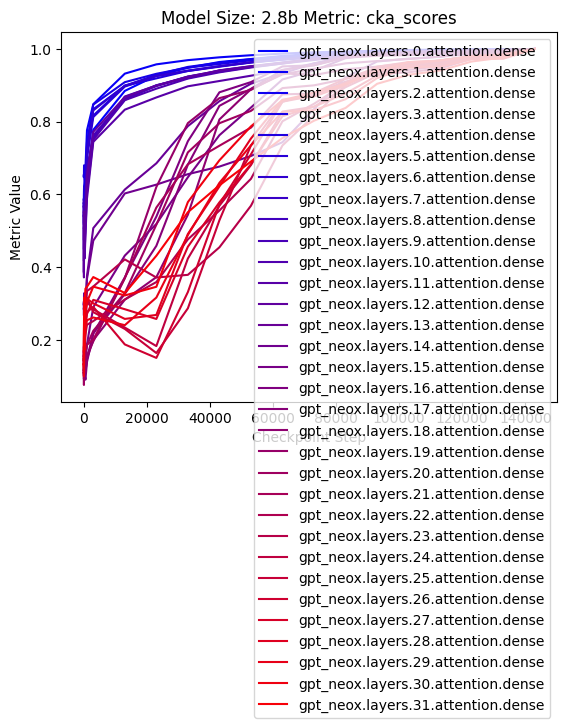

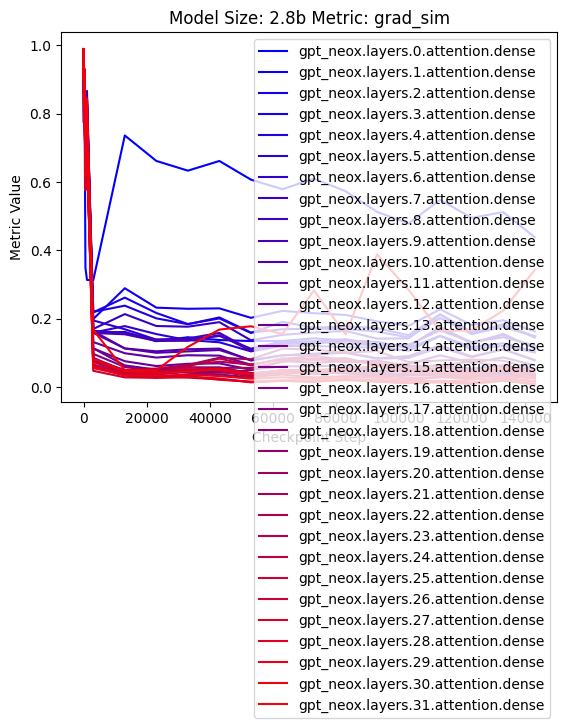

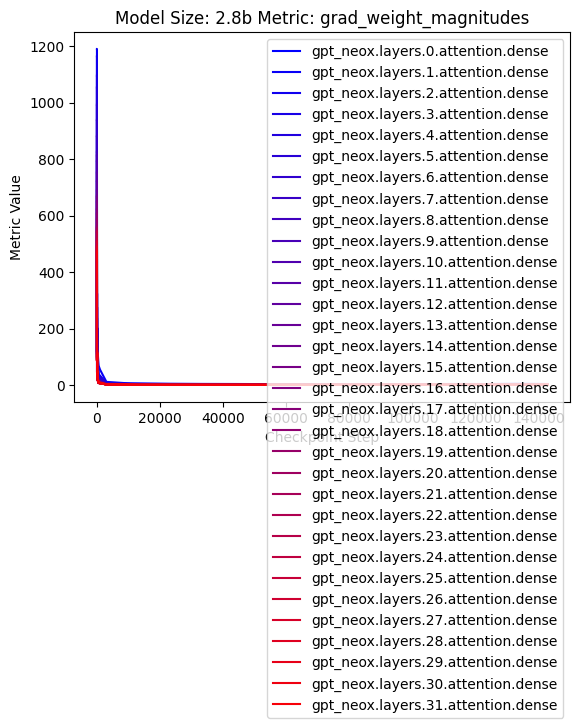

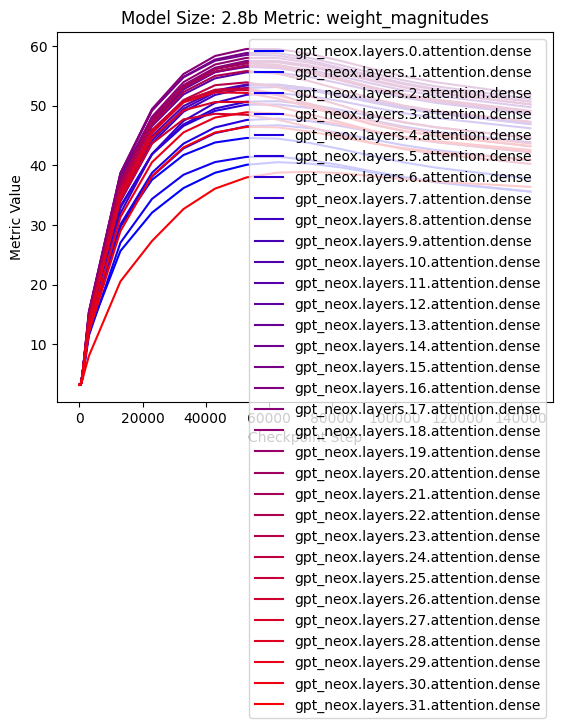

In [18]:
for model_size in MODEL_SIZES:
    checkpoint_evals = get_checkpoint_evals(model_size)
    for metric_name in METRICS:
        try: 
            with open(f'/home/rd654/pretraining-playground/compiled_statistics/{model_size}/{metric_name}_per_layer.pkl', 'rb') as f:
                _metrics = pickle.load(f)
                metrics = sort_and_filter_metrics(_metrics, filter_layer_name="attention.dense")
        except: 
            continue 

        plt.title("Model Size: " + model_size + " Metric: " + metric_name)
        # plot out the results
        for i, layer in enumerate(metrics.keys()):
            # Compute the color gradient
            color = (i / len(metrics.keys()), 0, 1 - i / len(metrics.keys()))
            plt.plot(CHECKPOINT_STEPS, metrics[layer], label=layer, color=color)
        
        plt.legend()
        plt.xlabel("Checkpoint Step")
        plt.ylabel("Metric Value")

        plt.show()